#  `find_disconnected_voxels` 

Detects the isolated regions that are not connected to the edges of the image. This function uses the `label` method in scipy ndimage with a specific structuring element to find the disconnected voxels. A cluster of connected pixels or isolated pixels are labeled with a unique value. Then a scikitimage `clear_border` filter is applied on the labeled regions to remove the regions that are connected to the borders of the image. The resulting filtered image includes the isolated regions that are disconnected from the edges of the image.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps
import inspect
inspect.signature(ps.filters.find_disconnected_voxels)

<Signature (im, conn=None, surface=False)>

## `im`
The input image is a binary image, with `True` (or 1) values indicating the phase for which disconnected voxels are to be found.

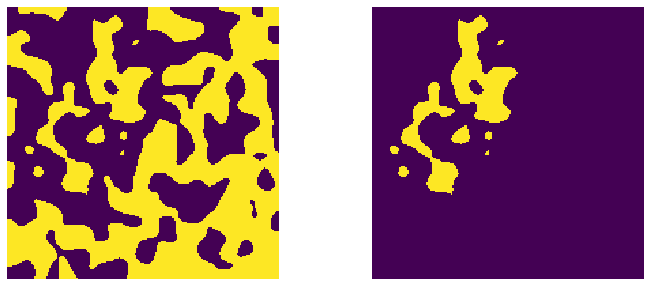

In [2]:
np.random.seed(10)
im = ps.generators.blobs(shape=[200,200])
discon_voxels = ps.filters.find_disconnected_voxels(im=im)
fig, ax = plt.subplots(1, 2, figsize=[12, 5])
ax[0].imshow(im, origin='lower', interpolation='none')
ax[0].axis(False)
ax[1].imshow(discon_voxels, origin='lower', interpolation='none')
ax[1].axis(False);

## `conn`

Conn value is used for creating the structuring element that sweeps (filters) the image to find the disconnected voxels. The value of conn and subsequently the structuring element affect the detection of isolated regions (accuracy). The algorithm by default uses conn values of 8 and 26 for 2D and 3D images, respectively. Their corresponding structuring element are square and cube with radius of 3 voxels. The other options for the conn values are 4 and 6, which correspond to the structuring elements disk (in 2D) and ball (in 3D) with radius of 1, respectively.

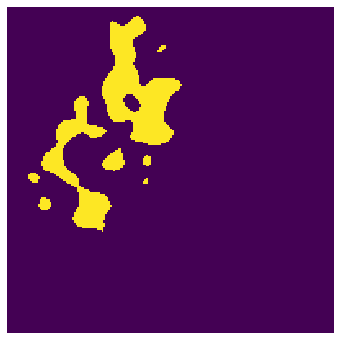

In [3]:
discon_voxels = ps.filters.find_disconnected_voxels(im=im, conn=4)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(discon_voxels, origin='lower', interpolation='none')
ax.axis(False);

## `surface`

Bt default, this Boolean parameter is `False`. If `True` any isolated regions touching the edge of the image are considered disconnected.

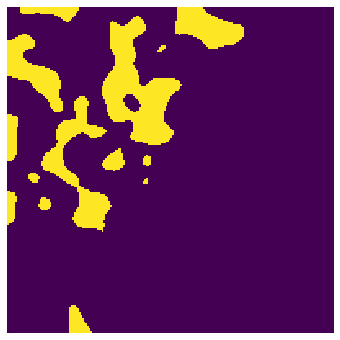

In [4]:
discon_voxels = ps.filters.find_disconnected_voxels(im=im, surface=True)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(discon_voxels, origin='lower', interpolation='none')
ax.axis(False);